# Imports

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
from pyvis.network import Network
from pyvis import network as net
import pandas as pd
from IPython.display import  HTML

# 1. Visualizar Grafos con Networkx

La libreria NetworkX permite la creación, manipulación y el estudio de estructuras de tipo grafo o red. 

NetworkX proporciona:

- Herramientas para el estudio de la estructura de dinamicas sociales, biológicas y redes estructurales

- una interfaz de programación estandard y una implementación de grafos que es adaptable a diferentes aplicaciones

- permite un entorno de trabajo colaborativo

- una interfaz a diferentes algoritmos numericos

Esta no es una librería de visualización pero visualizaciones básicas con Matplotlib están incluidas en el paquete

## 1.1. Opciones de visualización

In [2]:
g = nx.Graph() 
  
g.add_edge(1, 2) 
g.add_edge(2, 3) 
g.add_edge(3, 4) 
g.add_edge(1, 4) 
g.add_edge(1, 5) 
g.add_edge(5, 6) 
g.add_edge(5, 7) 
g.add_edge(4, 8) 
g.add_edge(3, 8)

/home/miguelangel/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


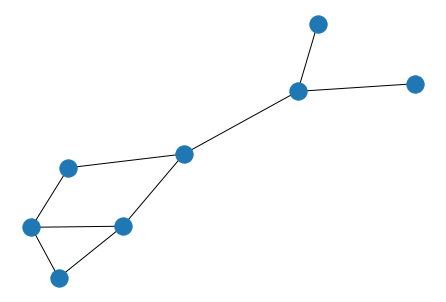

In [3]:
nx.draw(g)

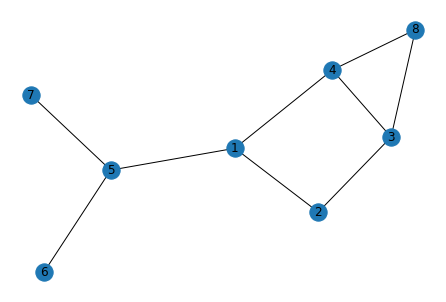

In [4]:
nx.draw(g, with_labels = True) 

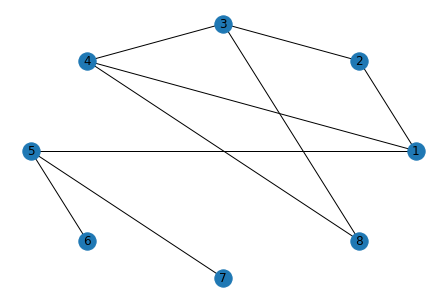

In [5]:
nx.draw_circular(g, with_labels = True) 

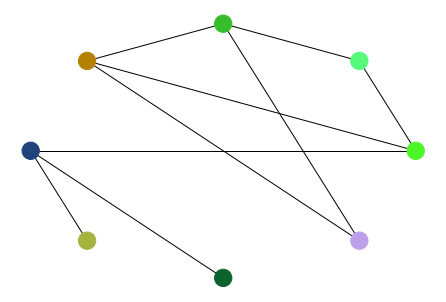

In [6]:
from random import random
colors = [(random(), random(), random()) for _i in range(8)]
nx.draw_circular(g, node_color= colors)

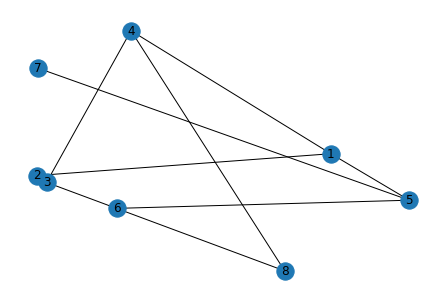

In [7]:
nx.draw_random(g, with_labels = True) 

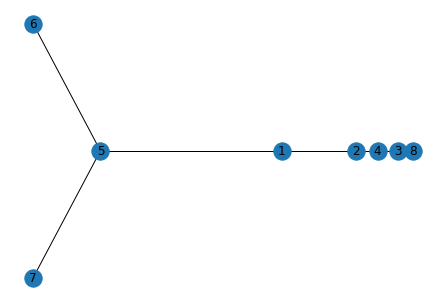

In [8]:
nx.draw_spectral(g, with_labels = True) 

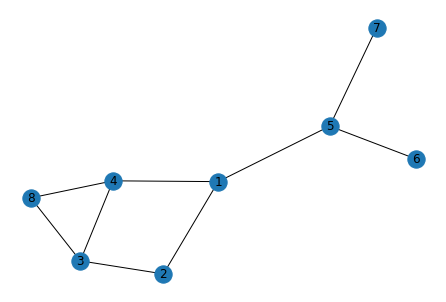

In [9]:
nx.draw_spring(g, with_labels = True) 

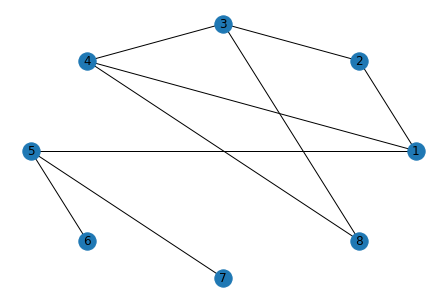

In [10]:
nx.draw_shell(g, with_labels = True) 

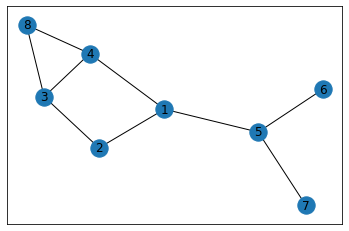

In [13]:
nx.draw_networkx(g, with_labels = True) # añadimos ejes

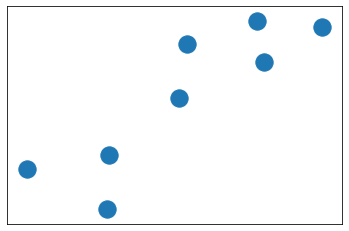

In [14]:
# representar únicamente los nodos
pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g,  pos = pos) 

Utilizando matplotlib se pueden representar varios grafos y dar opciones de representación

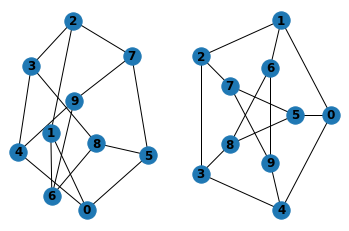

In [15]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

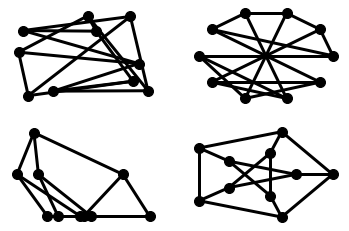

In [16]:
options = {'node_color': 'black','node_size': 100,'width': 3}
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

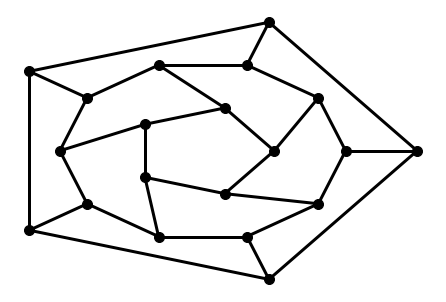

In [17]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

Las figuras se pueden guardar

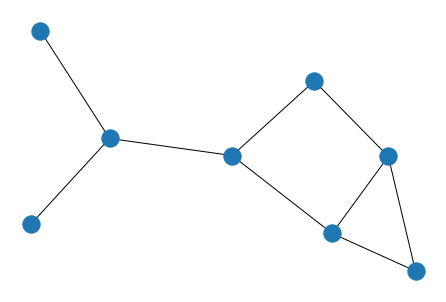

In [20]:
nx.draw(g)
plt.savefig("img/grafo.png")

## 1.2. Unión de grafos

**Unión**

Grafo inicial:


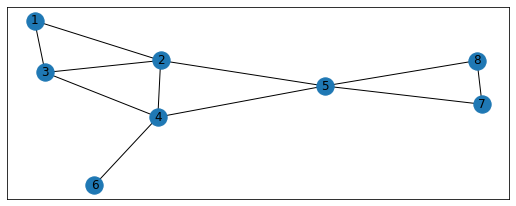

In [21]:
G = nx.Graph() 
  
plt.figure(figsize =(9, 12)) 
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4),  
                         (4, 5), (4, 6), (5, 7), (5, 8), (7, 8)]) 

print("Grafo inicial:") 
plt.subplot(311) 
nx.draw_networkx(G) 

Subgrafo:


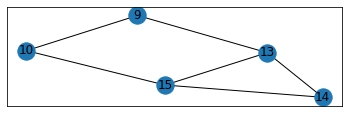

In [22]:
H = nx.Graph() 
H.add_edges_from([(13, 14), (13, 15), (13, 9), 
                  (14, 15), (15, 10), (9, 10)]) 
  
plt.subplot(212) 
print("Subgrafo:") 
nx.draw_networkx(H) 

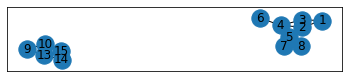

In [23]:
I = nx.union(G, H) 
plt.subplot(313) 
nx.draw_networkx(I) 

**Composición**

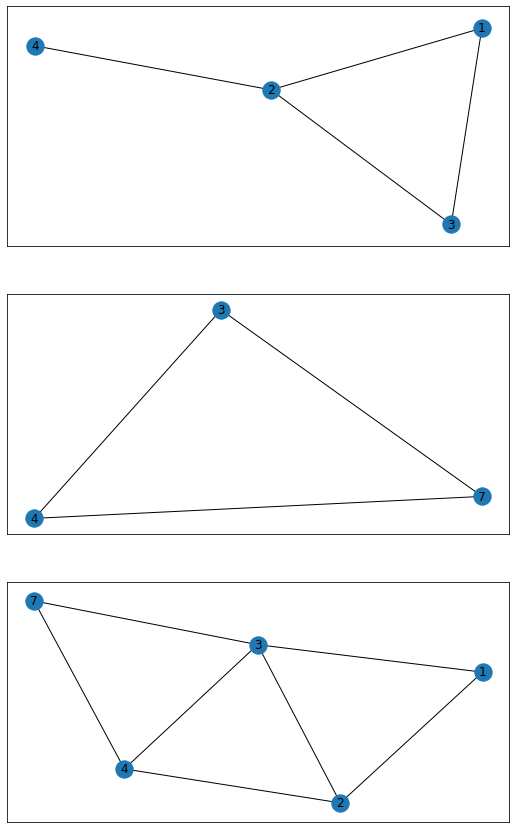

In [24]:
G = nx.Graph() 
  
plt.figure(figsize =(9, 15)) 
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)]) 
  
# First Graph created 
plt.subplot(311) 
nx.draw_networkx(G) 
  
H = nx.Graph() 
H.add_edges_from([(3, 7), (7, 4), (3, 4)]) 
# Second Graph created 
plt.subplot(312) 
nx.draw_networkx(H) 
  
  
I = nx.compose(G, H) 
plt.subplot(313) 
nx.draw_networkx(I)

**Grafo Complementario**

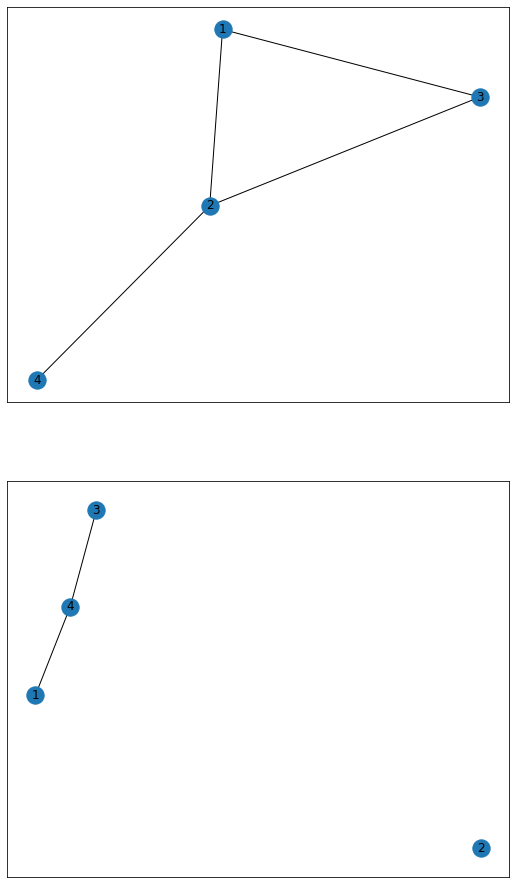

In [25]:
G = nx.Graph() 
  
plt.figure(figsize =(9, 16)) 
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2, 4)]) 
  
# Original Graph created 
plt.subplot(211) 
nx.draw_networkx(G) 
  
H = nx.complement(G) 
plt.subplot(212) 
nx.draw_networkx(H)

# 2. Visualización con PyVis

El paquete Pyvis está contruido sobre la biblioteca VisJS. Esta librería permite gráficos interactivos. Además los nodos pueden recibir colores, tamaños, etiquetas u otros metadatos. 

In [27]:
g = net.Network(notebook=True)
nxg = nx.complete_graph(5)
g.from_nx(nxg)
g.show('img/example.html')

In [28]:
g = Network(height = 800, width = 800, notebook = True)
g.toggle_hide_edges_on_drag(True)
g.barnes_hut()
g.from_nx(nx.davis_southern_women_graph())
g.show("img/ex.html")